# Analysis and Visualization

In [131]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [234]:
# Importing data
df = pd.read_csv('datasets/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [235]:
df = pd.DataFrame(np.array(df), columns = ['Tweet_id', 'Category', 'Target', 'Tweet'])
df.head()

,Tweet_id,Category,Target,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [134]:
df.shape

(74681, 4)

In [268]:
df_validate = pd.read_csv("datasets/twitter_validation.csv")

In [269]:
df_validate = pd.DataFrame(np.array(df_test), columns = ['Tweet_id', 'Category', 'Target', 'Tweet'])
df_validate.head()

,Tweet_id,Category,Target,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [137]:
df_validate.shape

(999, 4)

## Visualising Categories

In [138]:
df.Category.value_counts()

Category
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)      

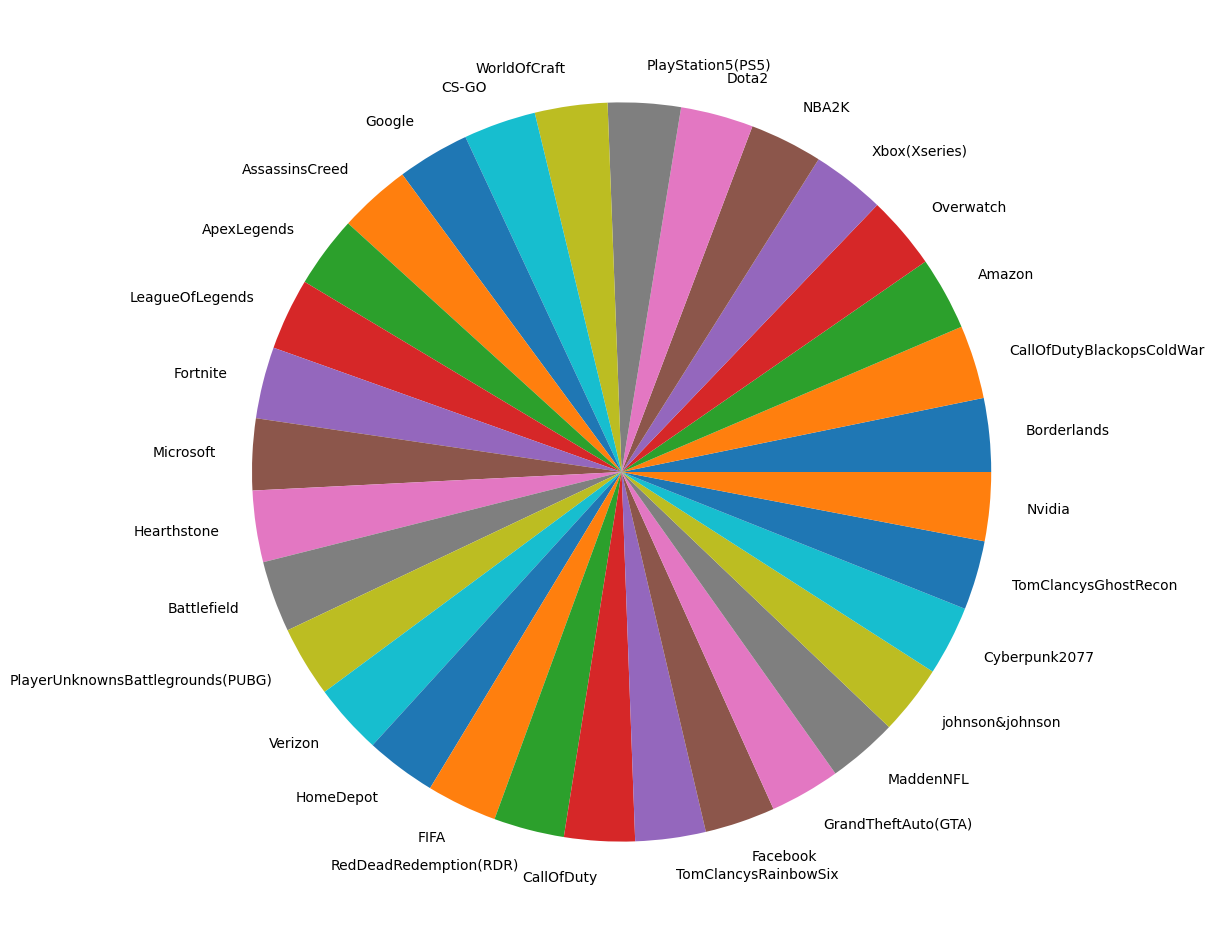

In [139]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.pie(df.Category.value_counts(), labels = df.Category.unique());
# plt.legend();

## Visualising target column

In [140]:
df.Target.value_counts()

Target
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

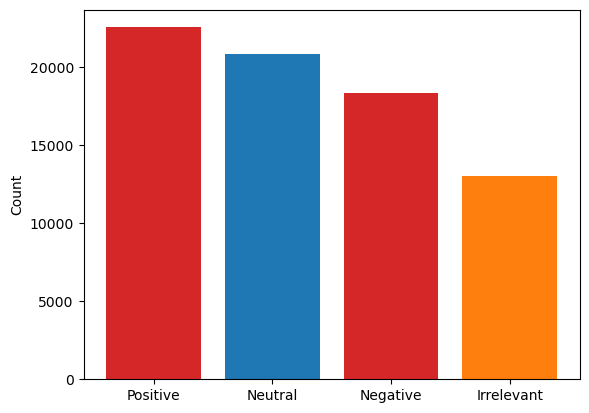

In [141]:
fig, ax = plt.subplots()
ax.bar(df.Target.unique(), df.Target.value_counts(), color = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange'] );
plt.ylabel('Count');

## Sentiment Analysis for various categories

In [142]:
pd.crosstab(df.Category, df.Target)

Target,Irrelevant,Negative,Neutral,Positive
Category,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1019
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


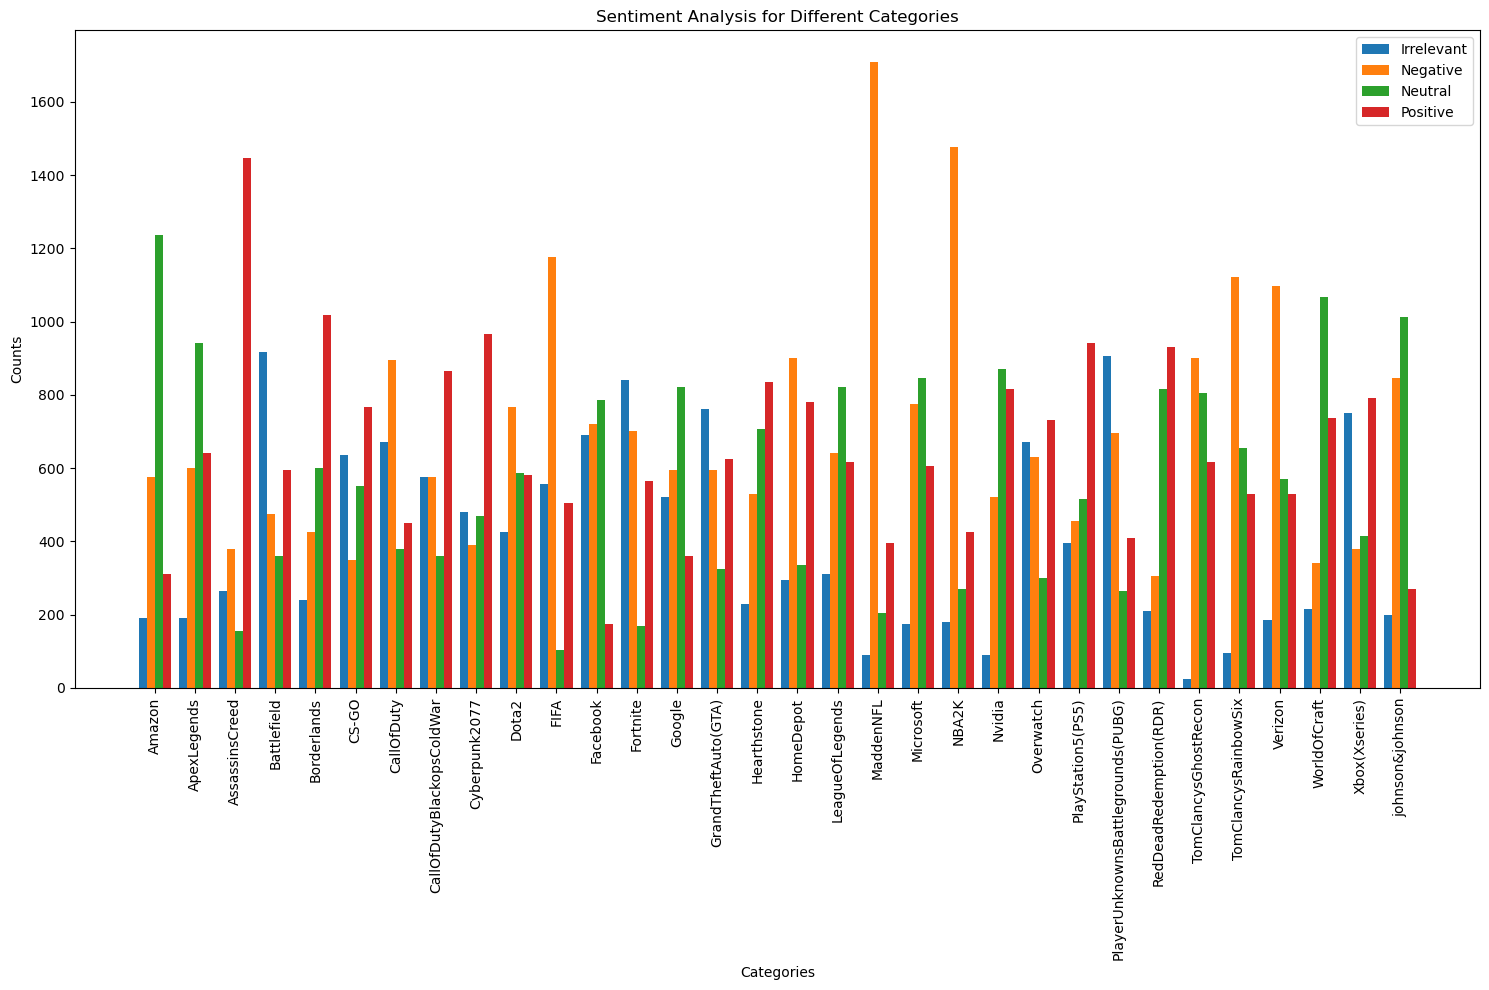

In [143]:
data = np.array(pd.crosstab(df.Category, df.Target))

categories = ['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield', 'Borderlands', 'CS-GO', 'CallOfDuty',
              'CallOfDutyBlackopsColdWar', 'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
              'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot', 'LeagueOfLegends', 'MaddenNFL', 'Microsoft',
              'NBA2K', 'Nvidia', 'Overwatch', 'PlayStation5(PS5)', 'PlayerUnknownsBattlegrounds(PUBG)',
              'RedDeadRedemption(RDR)', 'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon', 'WorldOfCraft',
              'Xbox(Xseries)', 'johnson&johnson']

sentiments = ['Irrelevant', 'Negative', 'Neutral', 'Positive']

# Calculate the position for each bar
bar_width = 0.2
bar_positions = np.arange(len(categories))

fig, ax = plt.subplots(figsize = (15, 10))

# Create grouped bar chart
for i, sentiment in enumerate(sentiments):
    ax.bar(bar_positions + i * bar_width, data[:, i], width=bar_width, label=sentiment)

# Customize chart
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Sentiment Analysis for Different Categories')
plt.xticks(bar_positions + (len(sentiments) - 1) * bar_width / 2, categories, rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Words affecting the sentiments the most

In [144]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

def process_text(text):
    # Check for NaN values
    if pd.isna(text):
        return []
    
    tokens = word_tokenize(str(text).lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in string.punctuation]
    return tokens

# Process the tweets and create frequency distributions for each sentiment
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']
sentiment_freq_dists = {}

for sentiment in sentiments:
    sentiment_tweets = df[df['Target'] == sentiment]['Tweet'].apply(process_text)
    sentiment_words = [word for sublist in sentiment_tweets for word in sublist]
    sentiment_freq_dists[sentiment] = FreqDist(sentiment_words)

# Display the most common words triggering each sentiment
# for sentiment, freq_dist in sentiment_freq_dists.items():
#     print(f"Top words triggering {sentiment} sentiment:")
#     print(freq_dist.most_common(10))
#     print()
words = {}
for sentiment, freq_dist in sentiment_freq_dists.items():
    words[sentiment] = freq_dist.most_common(10)

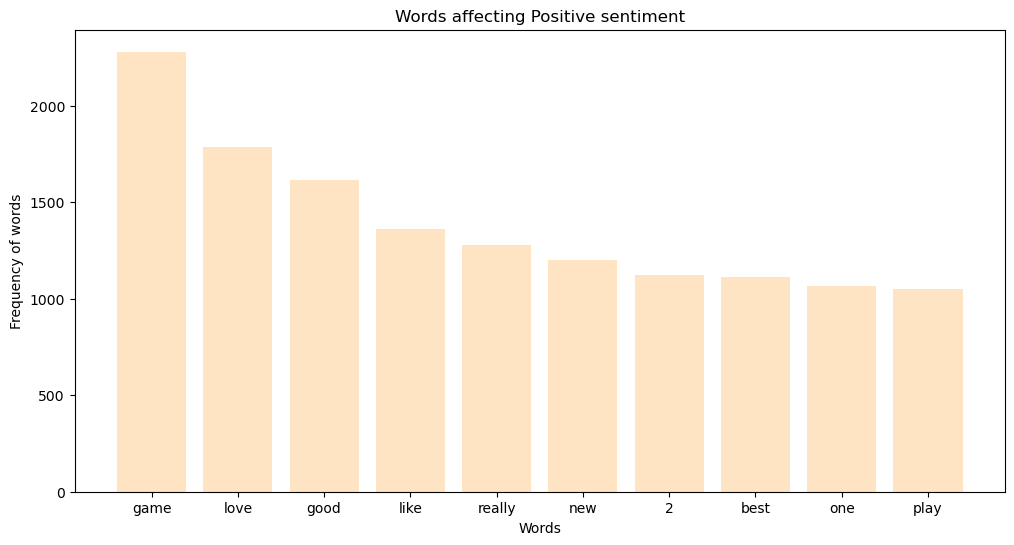

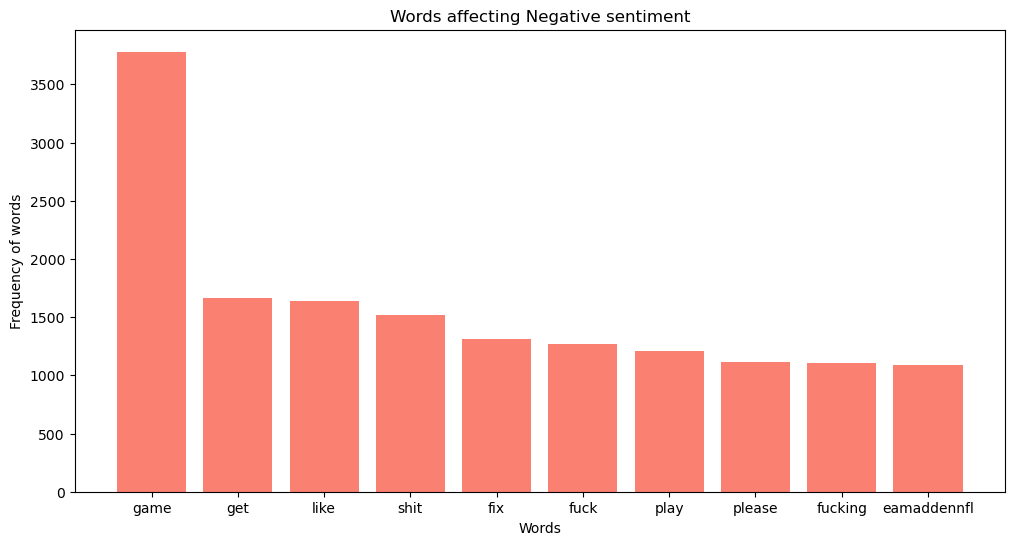

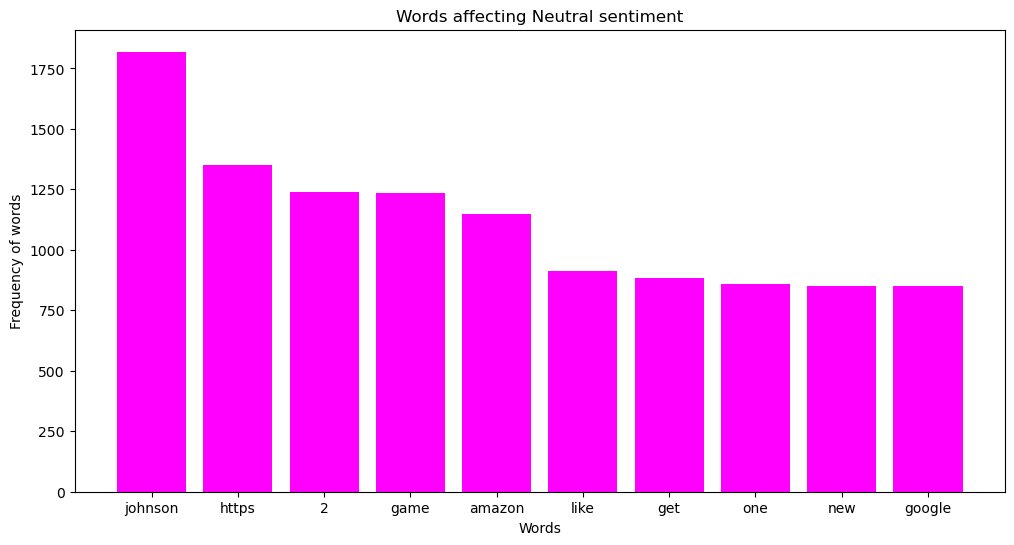

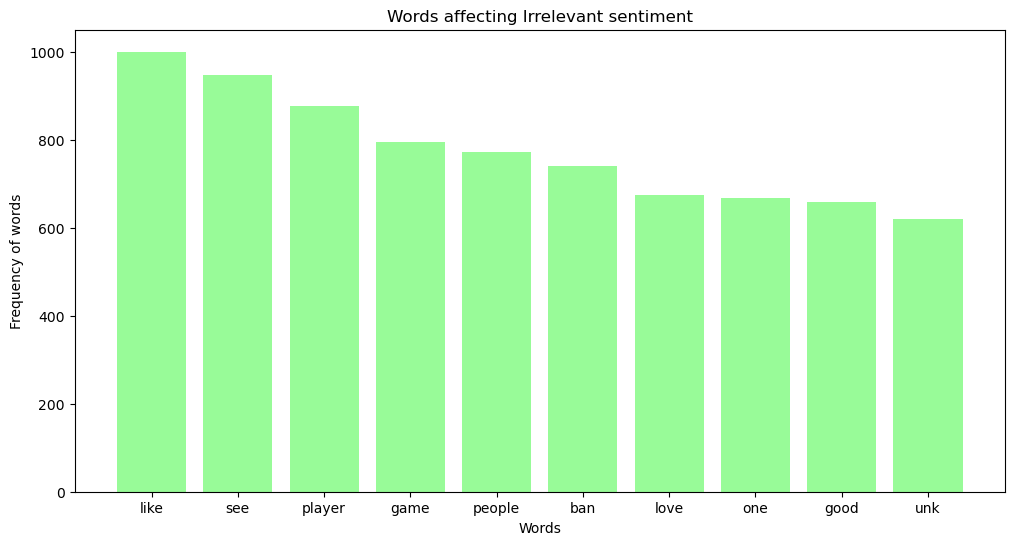

In [145]:
colors = ['bisque', 'salmon', 'magenta', 'palegreen'] 
for index in range(0, 4):
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.bar(*zip(*words[f"{sentiments[index]}"]), color = colors[index])
    plt.title (f'Words affecting {sentiments[index]} sentiment')
    plt.ylabel("Frequency of words")
    plt.xlabel("Words")
    plt.show

## Data Preprocessing

In [146]:
# Checking for missing values
df.isnull().sum()

Tweet_id      0
Category      0
Target        0
Tweet       686
dtype: int64

In [147]:
df[df['Tweet'].isnull()]

,Tweet_id,Category,Target,Tweet
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


In [148]:
# Deleting blank tweets
df.dropna(inplace = True)

In [149]:
df.isna().sum()

Tweet_id    0
Category    0
Target      0
Tweet       0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_id  73995 non-null  object
 1   Category  73995 non-null  object
 2   Target    73995 non-null  object
 3   Tweet     73995 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [241]:
# Converting object dtype into categorical
def convert_to_categorical(df):
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label] = df[label].astype('category')
            df[label] = df[label].cat.codes + 0
    return df
            

In [242]:
df = convert_to_categorical(df)
df_val = convert_to_categorical(df_validate)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Tweet_id  74681 non-null  int16
 1   Category  74681 non-null  int8 
 2   Target    74681 non-null  int8 
 3   Tweet     74681 non-null  int32
dtypes: int16(1), int32(1), int8(2)
memory usage: 583.6 KB


In [244]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Tweet_id  999 non-null    int16
 1   Category  999 non-null    int8 
 2   Target    999 non-null    int8 
 3   Tweet     999 non-null    int16
dtypes: int16(2), int8(2)
memory usage: 6.0 KB


In [249]:
df.head()

,Tweet_id,Category,Target,Tweet
0,2342,4,3,27233
1,2342,4,3,64618
2,2342,4,3,64602
3,2342,4,3,64617
4,2342,4,3,64616


In [250]:
df_val.head()

,Tweet_id,Category,Target,Tweet
0,28,0,2,213
1,645,19,1,91
2,337,5,1,235
3,343,13,2,579
4,473,10,1,372


## Splitting dataset

In [251]:
X_train, y_train = df.drop('Target', axis = 1), df.Target
X_val, y_val = df_val.drop('Target', axis = 1), df_val.Target

## Modelling using RandomForestClassifier

In [252]:
%%time
rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 42)
rf_clf.fit(X_train, y_train)

CPU times: total: 25.5 s
Wall time: 3.64 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [253]:
rf_clf.score(X_val, y_val)

0.27427427427427425

In [254]:
y_pred_rf = rf_clf.predict(X_val)

In [255]:
y_val.unique()

array([2, 1, 3, 0], dtype=int8)

In [256]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.19      0.04      0.06       266
           2       0.28      0.79      0.41       285
           3       0.31      0.14      0.20       277

    accuracy                           0.27       999
   macro avg       0.19      0.24      0.17       999
weighted avg       0.21      0.27      0.19       999



C:\Users\Pravin kumar\Desktop\ML\Course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pravin kumar\Desktop\ML\Course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pravin kumar\Desktop\ML\Course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

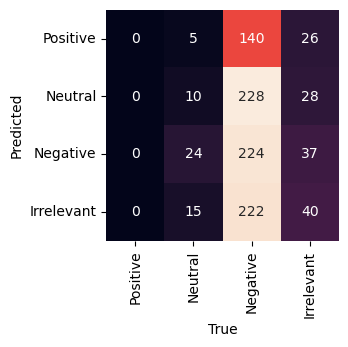

In [257]:
conf_mat_rf = confusion_matrix(y_val, y_pred_rf)
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(conf_mat_rf, 
                 annot = True, 
                 cbar = False, 
                 fmt = 'g', 
                 xticklabels=['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                 yticklabels=['Positive', 'Neutral', 'Negative', 'Irrelevant']
                )
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Modelling using XGBoost

In [260]:
model_xg = XGBClassifier(n_jobs = -1, random_state = 42)
model_xg.fit(X_train_xg, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [258]:
X_train_xg = X_train.drop('Tweet_id', axis = 1)

In [259]:
X_val_xg = X_val.drop("Tweet_id", axis = 1)

In [261]:
model_xg.score(X_val_xg, y_val)

0.35935935935935936

In [262]:
y_pred_xg = model_xg.predict(X_val_xg)
print(classification_report(y_val, y_pred_xg))

              precision    recall  f1-score   support

           0       0.34      0.33      0.34       171
           1       0.46      0.26      0.33       266
           2       0.34      0.69      0.46       285
           3       0.35      0.13      0.19       277

    accuracy                           0.36       999
   macro avg       0.37      0.35      0.33       999
weighted avg       0.38      0.36      0.33       999



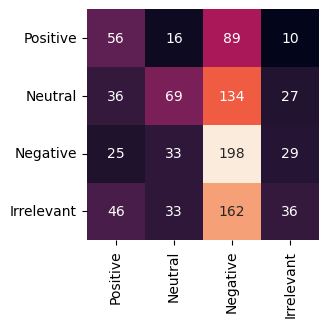

In [263]:
conf_mat_xg = confusion_matrix(y_val, y_pred_xg)
fig, ax = plt.subplots(figsize = (3, 3))
ax = sns.heatmap(conf_mat_xg, 
                 annot = True,
                 cbar = False,
                 fmt = 'g', 
                 xticklabels=['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                 yticklabels=['Positive', 'Neutral', 'Negative', 'Irrelevant']
                )

## Modelling using LogisticRegression

In [264]:
%%time
model_lr = LogisticRegression(n_jobs = -1, random_state = 42, solver = 'saga', max_iter = 1000)
model_lr.fit(X_train, y_train)

CPU times: total: 15.3 s
Wall time: 17 s


C:\Users\Pravin kumar\Desktop\ML\Course\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42, solver='saga')

In [265]:
model_lr.score(X_val, y_val)

0.2652652652652653

In [266]:
y_pred_lr = model_lr.predict(X_val)
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.14      0.02      0.03       266
           2       0.27      0.89      0.42       285
           3       0.24      0.02      0.04       277

    accuracy                           0.27       999
   macro avg       0.16      0.23      0.12       999
weighted avg       0.18      0.27      0.14       999



C:\Users\Pravin kumar\Desktop\ML\Course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pravin kumar\Desktop\ML\Course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pravin kumar\Desktop\ML\Course\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

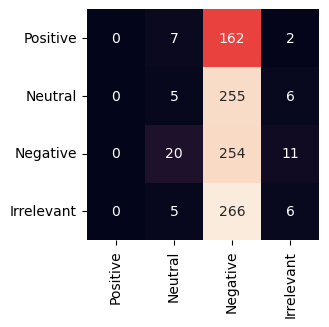

In [267]:
conf_mat_lr = confusion_matrix(y_val, y_pred_lr)
fig, ax = plt.subplots(figsize = (3, 3))
ax = sns.heatmap(conf_mat_lr, 
                 annot = True,
                 cbar = False,
                 fmt = 'g', 
                 xticklabels=['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                 yticklabels=['Positive', 'Neutral', 'Negative', 'Irrelevant']
                )

## Why model is doing to poor?

In [271]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

def process_text(text):
    # Check for NaN values
    if pd.isna(text):
        return []
    
    tokens = word_tokenize(str(text).lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in string.punctuation]
    return tokens

# Process the tweets and create frequency distributions for each sentiment
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']
sentiment_freq_dists = {}

for sentiment in sentiments:
    sentiment_tweets = df_validate[df_validate['Target'] == sentiment]['Tweet'].apply(process_text)
    sentiment_words = [word for sublist in sentiment_tweets for word in sublist]
    sentiment_freq_dists[sentiment] = FreqDist(sentiment_words)

# Display the most common words triggering each sentiment
# for sentiment, freq_dist in sentiment_freq_dists.items():
#     print(f"Top words triggering {sentiment} sentiment:")
#     print(freq_dist.most_common(10))
#     print()
words = {}
for sentiment, freq_dist in sentiment_freq_dists.items():
    words[sentiment] = freq_dist.most_common(10)

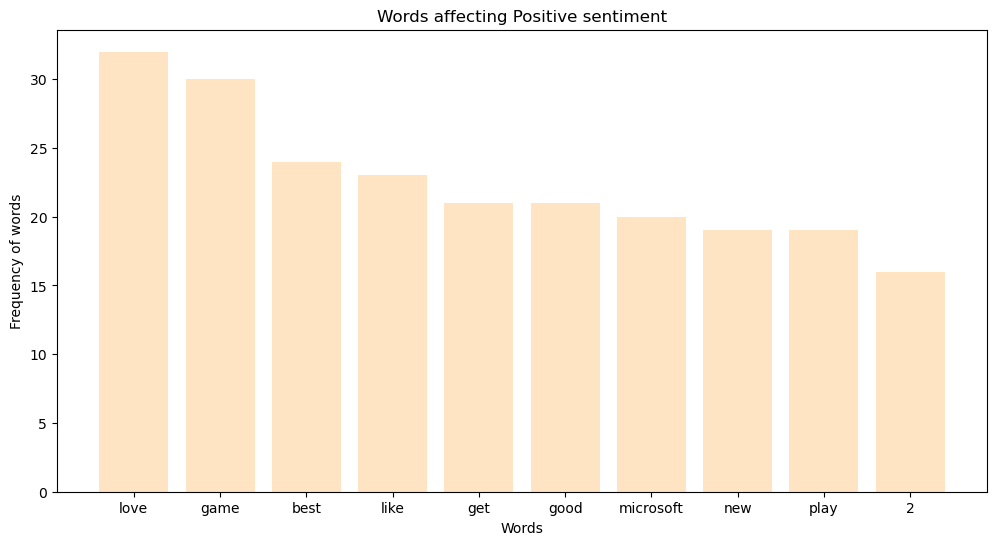

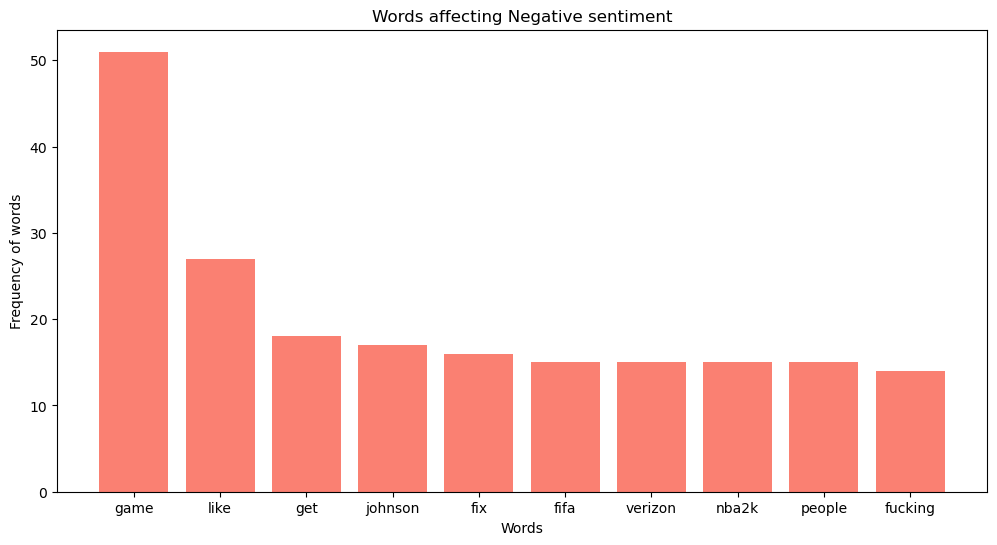

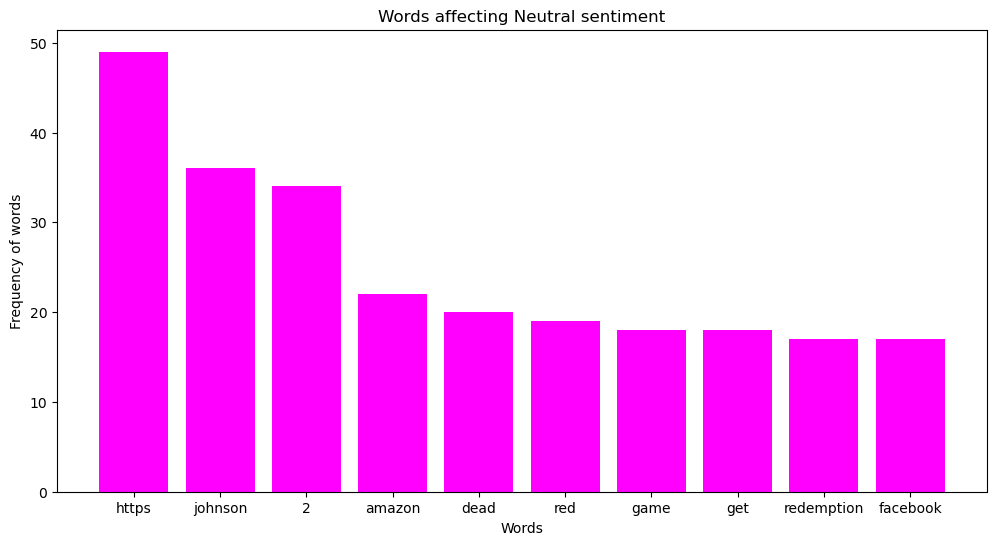

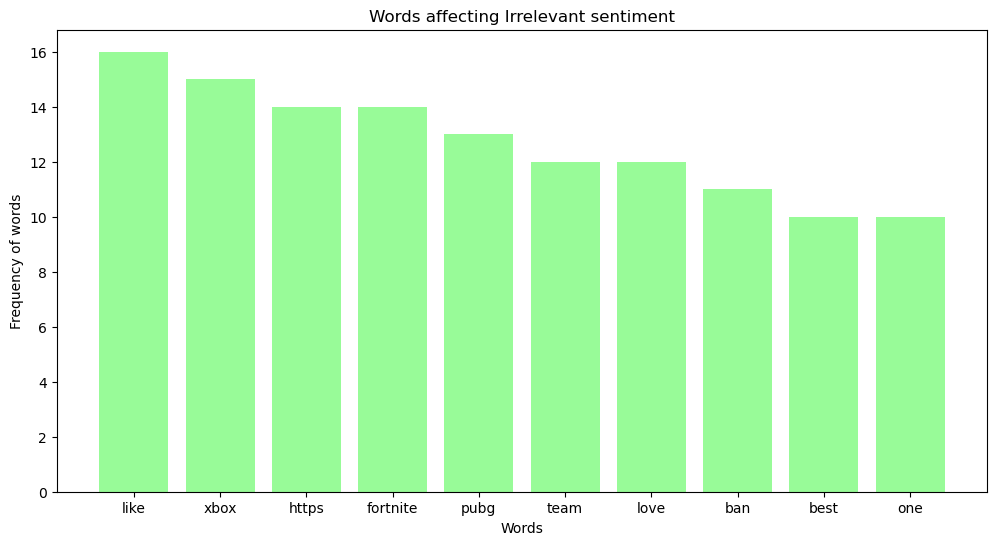

In [272]:
colors = ['bisque', 'salmon', 'magenta', 'palegreen'] 
for index in range(0, 4):
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.bar(*zip(*words[f"{sentiments[index]}"]), color = colors[index])
    plt.title (f'Words affecting {sentiments[index]} sentiment')
    plt.ylabel("Frequency of words")
    plt.xlabel("Words")
    plt.show